In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [2]:
df = pd.read_excel("시도별 전출입 인구수.xlsx", engine='openpyxl', header=0)

# NaN값을 바로 앞의 행 데이터값으로 채운다.
df = df.fillna(method = 'ffill')

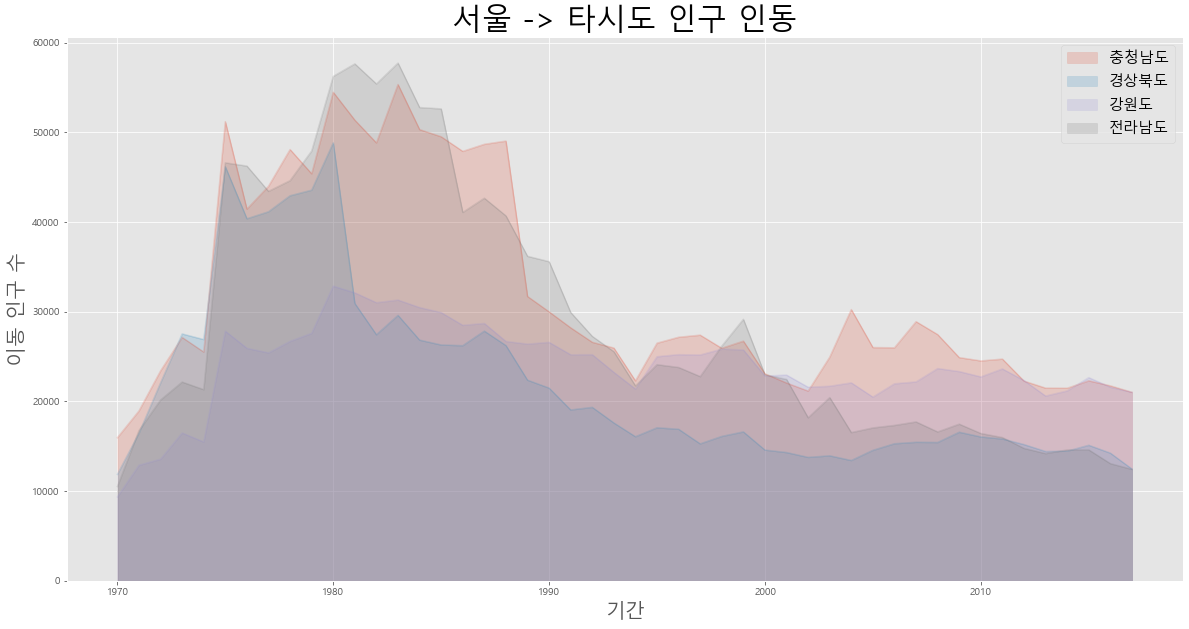

In [3]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True) # 행 인덱스로 지정

col_years = list(map(str,range(1970,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기(stacked=False)
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20,10))
plt.title('서울 -> 타시도 인구 인동', size=30)
plt.ylabel('이동 인구 수',size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)
plt.show()

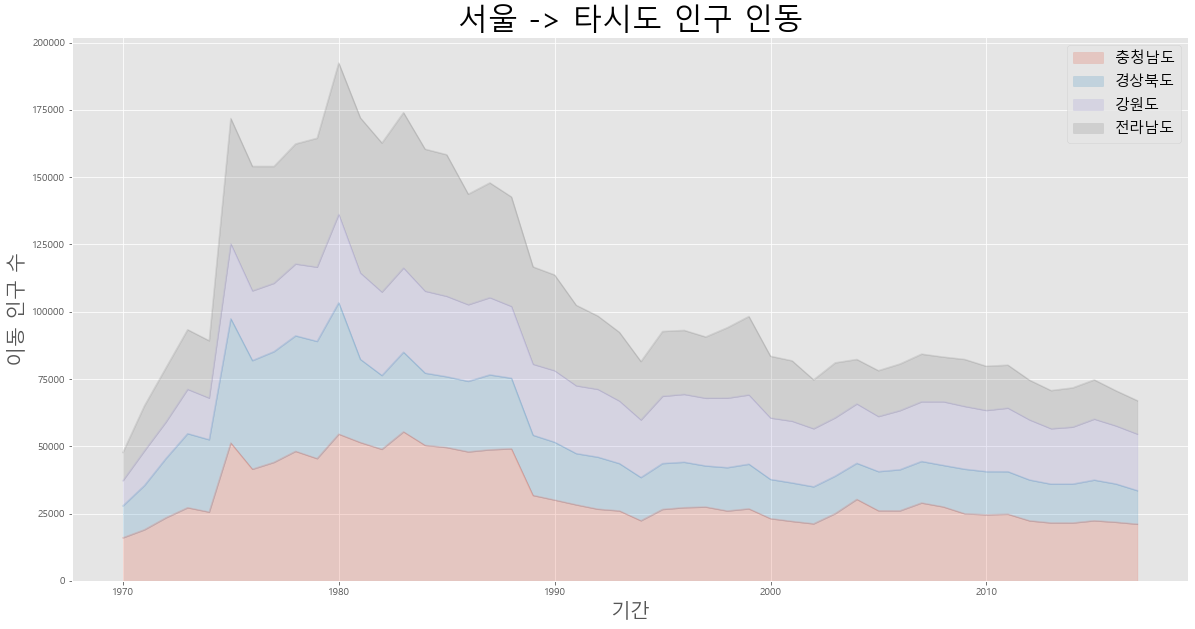

In [4]:
# 면적 그래프 그리기
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기(stacked=True)
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20,10))
plt.title('서울 -> 타시도 인구 인동', size=30)
plt.ylabel('이동 인구 수',size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)
plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


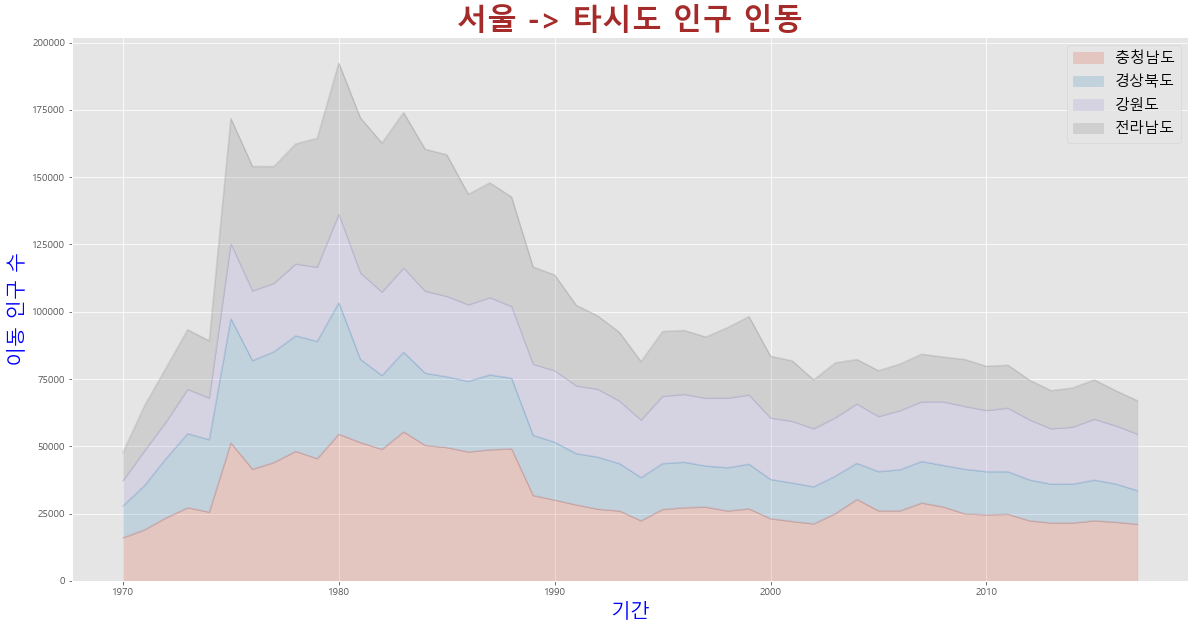

In [5]:
# axes 객체 속성 변경하기
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기(stacked=True)
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20,10))
print(type(ax))

ax.set_title('서울 -> 타시도 인구 인동', size=30,color='brown',weight='bold')
ax.set_ylabel('이동 인구 수',size=20,color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)
plt.show()